# Subgradient descent

## Least squares with $l_1$ regularization

$$
\min_{x \in \mathbb{R^n}} \dfrac{1}{2}\|Ax - b\|_2^2 + \lambda \|x\|_1
$$

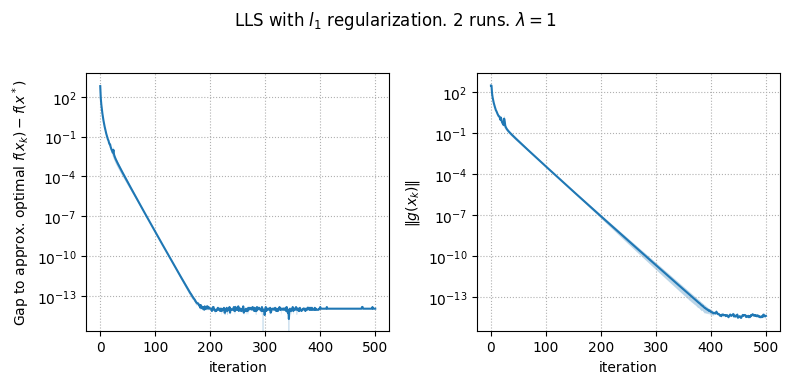

In [14]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(1)

# PARAMETERS
m = 50
n = 20
n_iter = 500
n_exp = 2
lam = 1
alpha = 0.01

f_vals_array = np.zeros((n_exp, n_iter+1))
g_norm_array = np.zeros((n_exp, n_iter+1))

def f(x, *f_params):
    A, b, lam = f_params
    return 0.5*np.linalg.norm(A@x - b, ord=2)**2 + lam*np.linalg.norm(x, ord=1)

def g(x, *f_params):
    A, b, lam = f_params
    return A.T@(A@x - b) + lam*np.sign(x)

def subgradient_descent(x_0, f, g, *f_params, alpha=0.001, n_iter=100):
    f_vals = []
    g_norms = []
    x = np.array(x_0)
    f_vals.append(f(x, *f_params))
    g_norms.append(np.linalg.norm(g(x, *f_params)))
    for i_iter in range(n_iter):
        grad = g(x, *f_params)
        x = x - alpha * grad
        f_vals.append(f(x, *f_params))
        g_norms.append(np.linalg.norm(grad))
    return f_vals, g_norms

# Adjust the loop to store gradient norms
for exp in range(n_exp):
    x_0 = np.random.randn(n)
    f_vals, g_norms = subgradient_descent(x_0, f, g, A, b, lam, alpha=alpha, n_iter=n_iter)
    f_vals_array[exp, :] = f_vals
    g_norm_array[exp, :] = g_norms

# Assuming the minimum value found as the approximate optimal value
approx_optimal_val = np.min(f_vals_array)

# Calculating the gap between current function values and the approximate optimal value
gap_array = f_vals_array - approx_optimal_val

fig = plt.figure(figsize=(8,4))
fig.suptitle(f'LLS with $l_1$ regularization. {n_exp} runs. $\lambda = {lam}$')

# Plotting the gap for the first subplot
ax1 = fig.add_subplot(1, 2, 1)
plt.grid(linestyle=":")
ax1.set_ylabel('Gap to approx. optimal $f(x_k) - f(x^*)$')
ax1.set_xlabel('iteration')
ax1.semilogy(gap_array.mean(axis=0)) 
ax1.fill_between(np.arange(n_iter+1), gap_array.mean(axis=0) - gap_array.std(axis=0),  gap_array.mean(axis=0) + gap_array.std(axis=0), alpha=0.3)

# The second subplot remains unchanged
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_ylabel('$\|g(x_k)\|$')
ax2.set_xlabel('iteration')
ax2.semilogy(g_norm_array.mean(axis=0)) 
ax2.fill_between(np.arange(n_iter+1), g_norm_array.mean(axis=0) - g_norm_array.std(axis=0),  g_norm_array.mean(axis=0) + g_norm_array.std(axis=0), alpha=0.3)

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.grid(linestyle=":")
plt.savefig('SD_gap.pdf')
# plt.show()
